In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [8]:
np.random.seed(42)
X = np.vstack([
    np.random.multivariate_normal([0, 0], np.eye(2), 50),
    np.random.multivariate_normal([5, 5], np.eye(2), 50)
])
N, D = X.shape
K = 2

In [9]:
means = np.random.rand(K, D) * 5
covs = np.array([np.eye(D)] * K)
weights = np.ones(K) / K
resps = np.zeros((N, K))

In [10]:
for i in range(10):
    # E-Step: Calculate Responsibilities
    for k in range(K):
        resps[:, k] = weights[k] * multivariate_normal.pdf(X, means[k], covs[k])
    resps /= resps.sum(axis=1, keepdims=True) # Normalize

    # M-Step: Update Parameters
    for k in range(K):
        Nk = resps[:, k].sum()
        means[k] = (resps[:, k, None] * X).sum(axis=0) / Nk
        diff = X - means[k]
        covs[k] = np.dot((resps[:, k, None] * diff).T, diff) / Nk
        weights[k] = Nk / N



In [11]:
final_assignments = np.argmax(resps, axis=1)

print("Final Means:")
print(means)
print("\nCluster Counts:")
print(np.bincount(final_assignments))

Final Means:
[[ 4.90454705  5.14006197]
 [-0.13567565 -0.07201741]]

Cluster Counts:
[50 50]


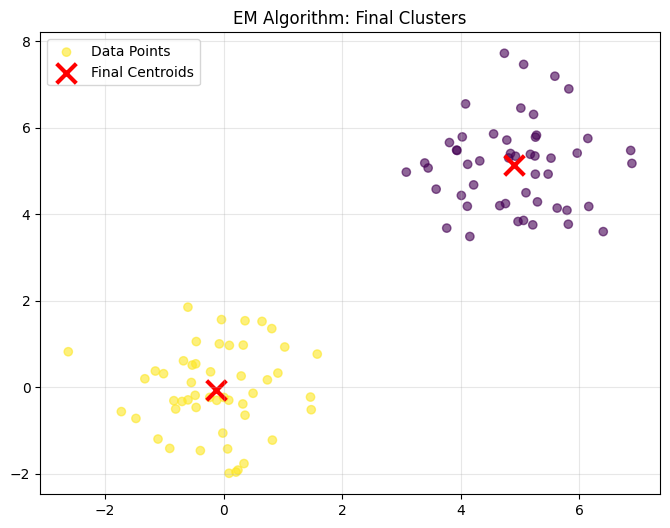

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_assignments, cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=200, lw=3, label='Final Centroids')
plt.title("EM Algorithm: Final Clusters")
plt.legend()
plt.grid(alpha=0.3)
plt.show()